# <font color=#00008C>다중선형 회귀 분석</font>을 통한 <font color=#CD0000>고혈압 유병여부</font> 예측<br>
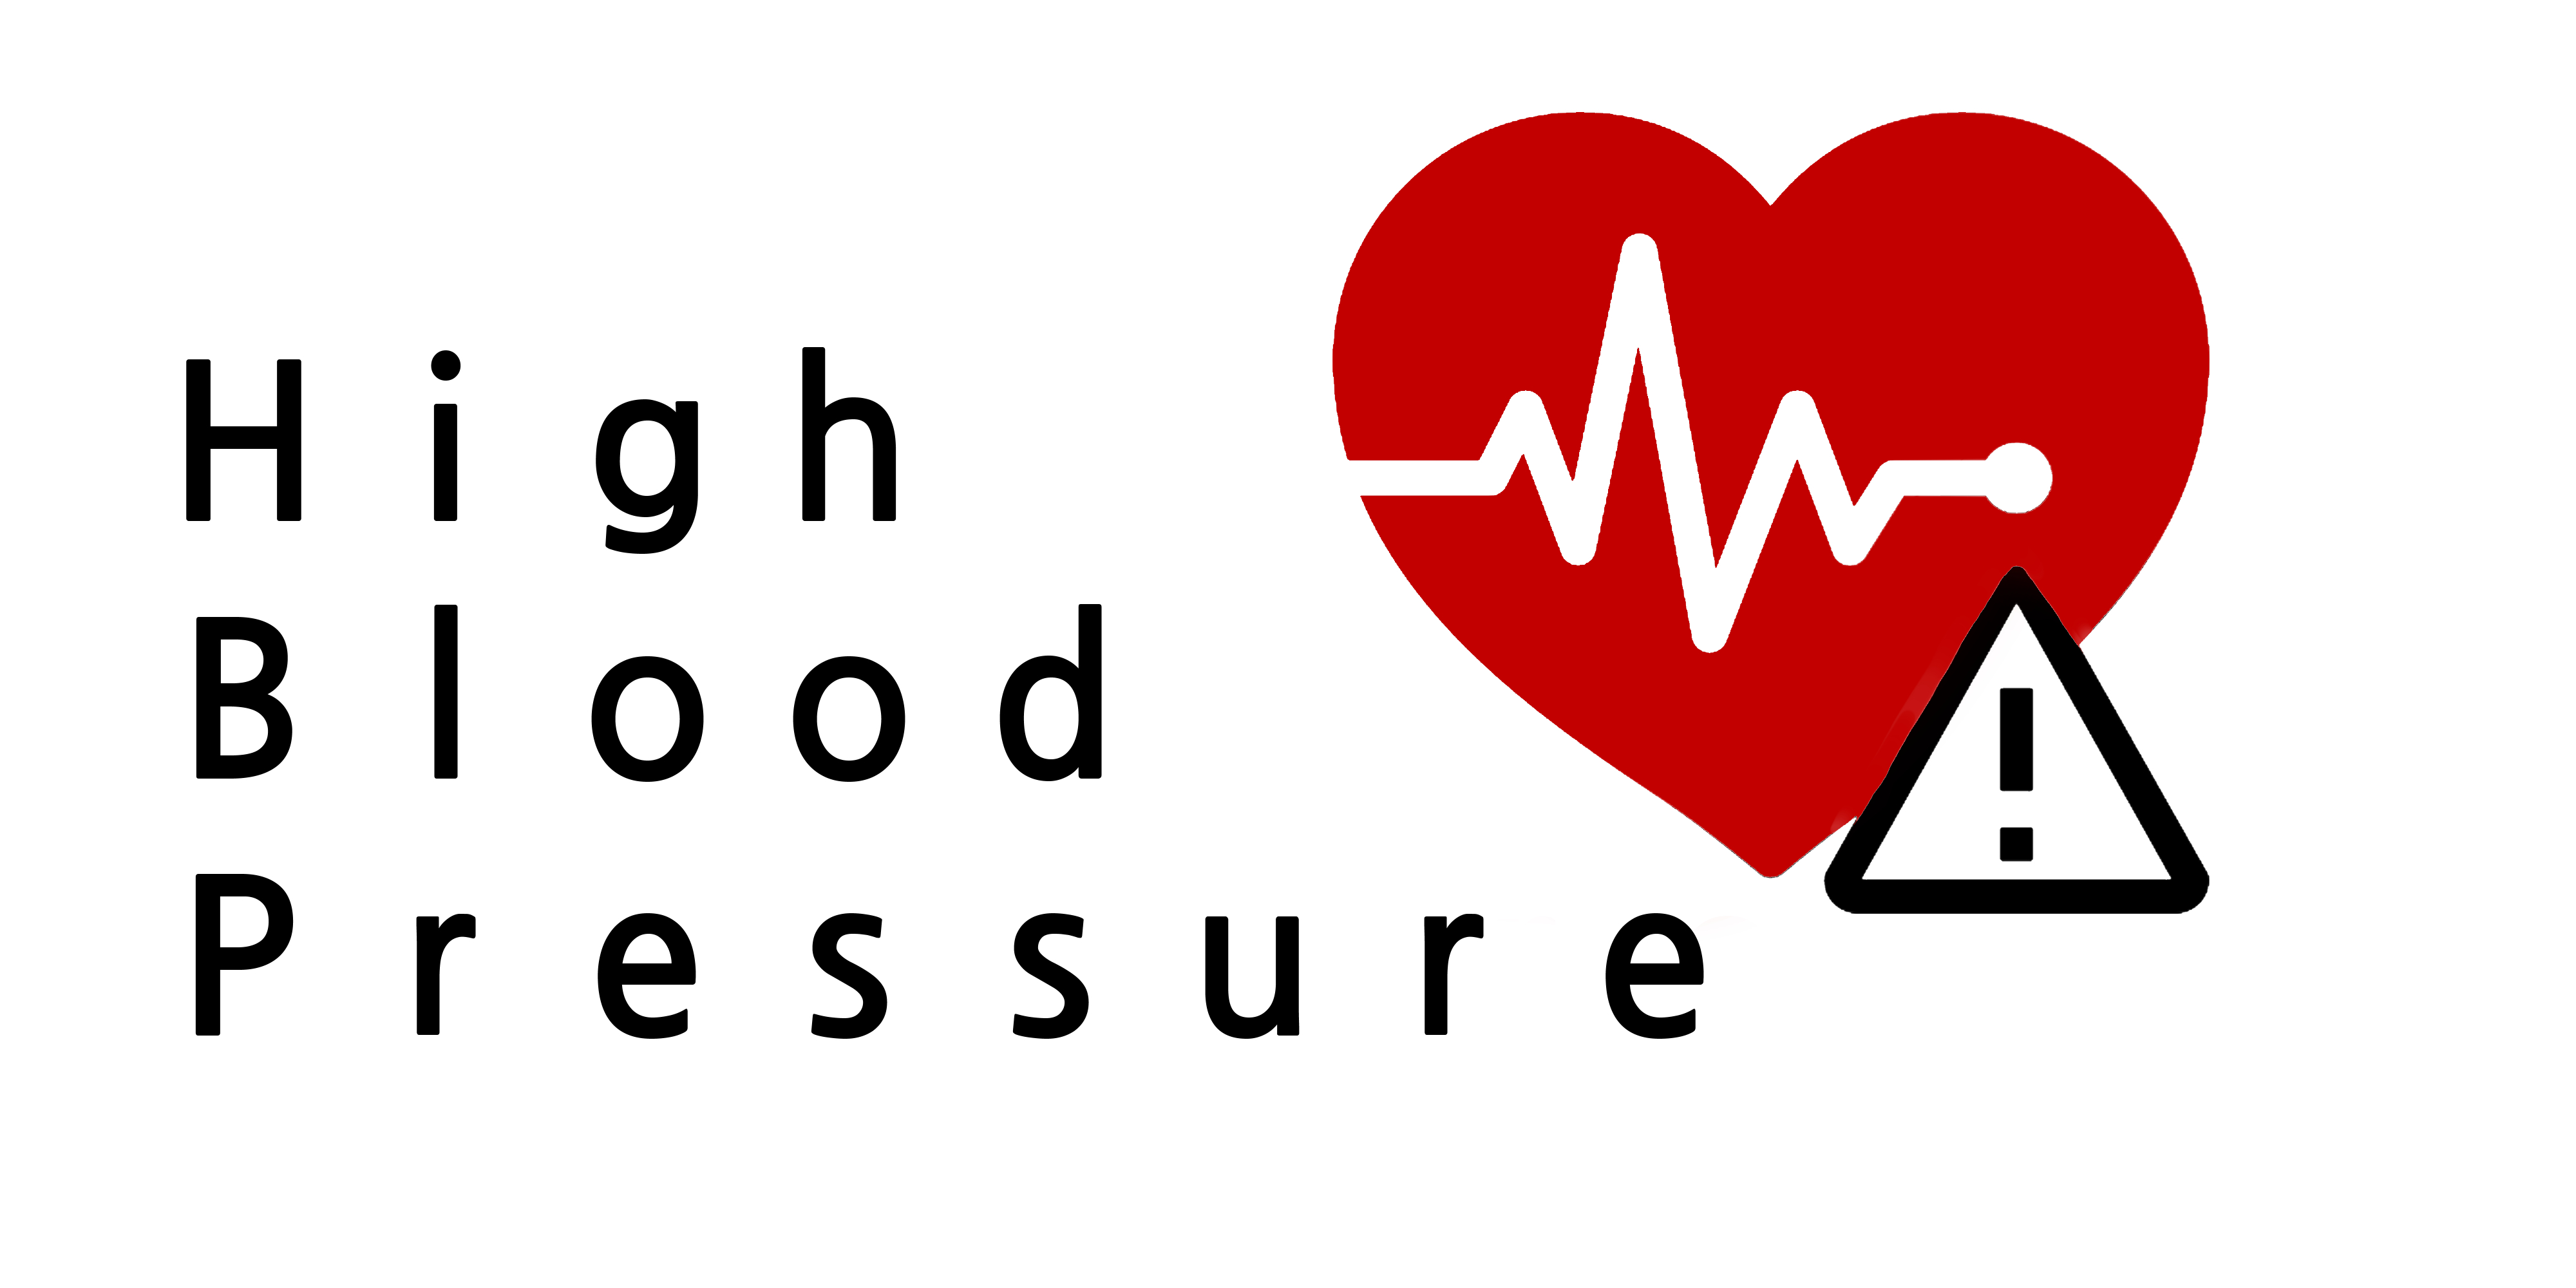

------

## 고혈압의 정의
### **'고혈압'**: 혈압이 여러 원인으로 인해 높아진 상태.<br> 
**'혈압'**: 동맥혈관 벽에 대항한 혈액의 압력. <br>
**'수축기 혈압'**: 혈액의 압력은 심장이 수축하여 동맥혈관으로 혈액을 보낼 때의 혈압. <br>
**'이완기 혈압'**: 심장이 늘어나서 혈액을 받아들일 때의 혈압. <br> 

**'수축기 혈압'**과 **'이완기 혈압'**에 따라 고혈압 발병 여부를 판단한다. <br><br>

- 대한고혈압학회와 미국심장학회의 혈압 기준

① 정상 혈압 : 수축기 혈압 **120mmHg** 미만, 확장기 혈압 **80mmHg** 미만

② 고혈압 전 단계 : 수축기 혈압 **120 ~ 139mmHg**이거나, 확장기 혈압 **80 ~ 89mmHg**

③ 1기 고혈압(경도 고혈압) : 수축기 혈압 **140 ~ 159mmHg**이거나, 확장기 혈압 **90 ~ 99mmHg**

④ 2기 고혈압(중등도 이상 고혈압) : 수축기 혈압 **160mmHg** 이상이거나, 확장기 혈압 **100mmHg** 이상
<br>
<br>
## 고혈압의 원인

- 고혈압을 유발하는 요인

① 심혈관 질환의 가족력(유전)<br>
② 흡연<br>
③ 고지혈증<br>
④ 당뇨병<br>
⑤ 60세 이후 노년층<br>
⑥ 성별(남성과 폐경 이후 여성)<br>
⑦ 식사성 요인 : Na, 지방 및 알코올의 과잉 섭취, K, Mg, Ca의 섭취 부족<br>
⑧ 약물 요인 : 경구 피임약, 제산제, 항염제, 식욕억제제<br>
<br><br>
자료 출처 : 서울아산병원 질병 백과 [고혈압]

----
## 탐구 프로젝트 개요
### (1) 데이터셋 
- <font color=#00008C>**국민건강영양조사(2019)**</font>

### (2) 탐구 질문
- 고혈압 발병에 영향을 주는 변수에는 무엇이 있는가?
- 고혈압은 가족력의 영향을 많이 받는가?
- 다중 선형 회귀 분석을 통해 고혈압 유병여부를 예측하는 모델을 만들 수 있는가?

### (3) 분석할 변수
#### -  <font color=#CD0000>**ID**</font> : 피실험자 
#### - <font color=#CD0000>**sex**</font>: 성별 
#### - <font color=#CD0000>**age**</font>: 나이
#### - <font color=#CD0000>**HE_BMI**</font>: 체질량 지수 
#### - <font color=#CD0000>**N_NA**</font>: 나트륨 섭취량(mg) 
#### - <font color=#CD0000>**HE_HPfh1**</font>: 고혈압 의사진단 여부(부) 
#### - <font color=#CD0000>**HE_HPfh2**</font>: 고혈압 의사진단 여부(모)
#### - <font color=#CD0000>**HE_sbp**</font>: 수축기 혈압
#### - <font color=#CD0000>**HE_dbp**</font>: 이완기 혈압
#### - <font color=#CD0000>**BS3_2**</font>: 하루 평균 흡연량
#### - <font color=#CD0000>**HE_HP, blood pressure**</font>: 고혈압 유병 여부
<br>

### (4) 가설 
**[안온유]**
- 고혈압 발병에 가장 많은 영향을 주는 요소는 <font color=#00008C>**'나트륨 섭취량'**</font>일 것이다. <br>
- 고혈압은 <font color=#00008C>**'가족력'**</font>의 영향을 많이 받을 것이다.  <br>
<br>

**[황도현]**
- 고혈압 발병에 가장 적은 영향을 주는 요소는 <font color=#00008C>**'성별'**</font>일 것이다.
- 고혈압은 가족력이 아닌 <font color=#00008C>**'후천적인 요소'**</font>에 영향을 많이 받을 것이다.  <br>

-----------

## <목차>

### 1. 데이터 수집 및 가공

### 2. 고혈압과 독립 변수들 간의 상관관계 분석
2.1 변수 간 상관관계를 표로 분석<br>
2.2 변수 간 상관관계를 pairplot으로 분석<br>
2.3 변수 간 상관관계를 다른 방법으로 시각화<br>
2.4 age와 고혈압 유병 여부의 상관관계 결과값 검정<br>
2.5 Fh와 고혈압 유병 여부의 상관관계 결과값 검정

### 3. 다중 선형 회귀 모델링
3.1 수축기 혈압 예측 모델 생성<br>
3.2 이완기 혈압 예측 모델 생성<br>

### 4. 모델예측
4.1 고혈압 유병여부 예측<br>
4.2 모델 예측 시각화<br>

### 5. 결론 및 고찰

-------------------------------------------------------------

# 1. 데이터 수집 및 가공

In [1]:
#필요한 모듈 라이브러리를 불러온다.
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

#경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

#코드 숨기기
from IPython.display import HTML

#모델링
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# 국민건강 영양조사 데이터 불러오기.
health19 = pd.read_excel("health19.xlsx")

# 필요한 열만 추출하기.
pre_data = health19.loc[:, ['ID', 'age', 'sex', 'N_NA', 'HE_BMI', 'HE_HPfh1', 'HE_HPfh2', 'BS3_2', 'HE_sbp', 'HE_dbp']].dropna()

# 고혈압 의사 진단 항목 응답이 9인 사람 제외 (응답이 9인 경우는 '모름'이라고 응답한 경우이기 때문)
del_index = pre_data[(pre_data['HE_HPfh1']==9) | (pre_data['HE_HPfh2']==9)].index
data = pre_data.drop(del_index)

# 고혈압 의사진단 여부(부)와 고혈압 의사진단 여부(모)를 Fh라는 열로 합침.
# 부모 중 한 분이라고 고혈압 진단을 받았다면 1, 둘 다 받지 않았다면 0으로 지정.
data['Fh'] = [1 if (a == 1) | (b == 1) 
                 else (0) for a,b in zip(data['HE_HPfh1'], data['HE_HPfh2'])]

# 데이터 열이 너무 많기 때문에 불필요해진 열은 삭제함.
data = data.drop(['HE_HPfh1','HE_HPfh2' ], axis =1 )

# 기존 데이터가 0,1로 셀이 지정되어 있지 않기 때문에 남성은 1, 여성은 0으로 새롭게 지정함.
data['sex'] = [0 if (k == 2)
                 else 1 for k in data['sex']]

# 성별에 폐경 여부를 결합하여 남성 및 폐경 이후 여성은 1, 폐경 이전 여성은 0으로 지정
data['HE_sex'] = [0 if (a < 50) & (b == 0) 
                 else (1 if (a >= 50) & (b == 0)
                 else 1) for a,b in zip(data['age'], data['sex'])]

# 수축기 혈압, 이완기 혈압은 토대로 고혈압 유병 여부 열 추가하기. (int형)
# 고혈압일 경우 3, 고혈압 전단계일 경우 2, 정상일 경우 1

data['HE_HP'] = [3 if (a >= 140) | (b >= 90)
                 else (2 if (a >= 120) & (a < 140) | (b >= 80) & (b < 90)
                 else 1) for a,b in zip(data['HE_sbp'], data['HE_dbp'])]

# 수축기 혈압, 이완기 혈압은 토대로 고혈압 유병 여부 열 추가하기. (string형)
# 고혈압일 경우 3, 고혈압 전단계일 경우 2, 정상일 경우 1

data['blood pressure'] = ['High' if (a >= 140) | (b >= 90)
                 else ('Pre_high' if (a >= 120) & (a < 140) | (b >= 80) & (b < 90)
                 else 'Normal') for a,b in zip(data['HE_sbp'], data['HE_dbp'])]


check_for_nan = data.isnull().values.any() # 결측값 NaN이 있는지 판별
print (check_for_nan) # 결측값이 없으면 false를 반환함.

data # 최종 데이터

False


,ID,age,sex,N_NA,HE_BMI,BS3_2,HE_sbp,HE_dbp,Fh,HE_sex,HE_HP,blood pressure
2,A501220401,53,1,4298.039324,19.781829,10.0,125.0,85.0,0,1,2,Pre_high
3,A501220402,50,0,3059.246088,26.631647,888.0,109.0,77.0,0,1,1,Normal
6,A501227201,80,0,3529.636494,21.325232,888.0,144.0,83.0,0,1,3,High
7,A501228901,77,0,1786.037966,23.870833,888.0,125.0,73.0,1,1,2,Pre_high
9,A501235701,80,1,4167.538893,26.681078,888.0,122.0,64.0,0,1,2,Pre_high
...,...,...,...,...,...,...,...,...,...,...,...,...
8103,R504375103,26,0,2129.010891,19.409690,888.0,98.0,66.0,0,0,1,Normal
8105,R504381902,48,0,3306.989552,20.535409,888.0,125.0,76.0,0,0,2,Pre_high
8106,R504393801,47,1,2731.730925,22.400779,888.0,122.0,83.0,1,1,2,Pre_high
8107,R504393802,43,0,1739.483856,15.375148,888.0,100.0,67.0,1,0,1,Normal


-------------
# 2. 고혈압과 독립변수들 간의 상관관계 분석<br>
## 2.1 변수 간 상관관계 표로 분석

In [3]:
#각 변량 간의 상관관계를 파악한다. 
#절댓값이 0.3 이상인 상관관계는 age - HE_HP, age - HE_sbp, sex - BS3_2, HE_HP - HE_sbp, HE_HP - HE_dbp, BP - age, BP - HE_HP, BP - HE_sbp, BP - HE_dbp
# 즉, 고혈압은 (당연하지만) 수축기혈압과 이완기 혈압과의 상관관계가 높고, 나이와의 상관관계도 높다.  
#고혈압과 가장 상관관계가 없는 변량은 N_NA(나트륨 섭취량(mg))이다. 
data_corr = data.corr()
data_corr

,age,sex,N_NA,HE_BMI,BS3_2,HE_sbp,HE_dbp,Fh,HE_sex,HE_HP
age,1.000000,-0.058043,-0.096886,0.195069,0.011356,0.460967,0.159143,-0.035318,0.467810,0.389468
sex,-0.058043,1.000000,0.311062,0.125764,-0.317793,0.088765,0.105173,-0.048994,0.558905,0.078661
N_NA,-0.096886,0.311062,1.000000,0.092814,-0.135644,-0.018457,0.082995,0.021135,0.127016,-0.007721
HE_BMI,0.195069,0.125764,0.092814,1.000000,-0.069073,0.269495,0.276203,0.070270,0.211090,0.250319
BS3_2,0.011356,-0.317793,-0.135644,-0.069073,1.000000,-0.024753,-0.099623,0.000468,-0.157305,-0.020654
HE_sbp,0.460967,0.088765,-0.018457,0.269495,-0.024753,1.000000,0.585503,0.024470,0.383271,0.852787
HE_dbp,0.159143,0.105173,0.082995,0.276203,-0.099623,0.585503,1.000000,0.128903,0.174769,0.641377
Fh,-0.035318,-0.048994,0.021135,0.070270,0.000468,0.024470,0.128903,1.000000,-0.063840,0.025902
HE_sex,0.467810,0.558905,0.127016,0.211090,-0.157305,0.383271,0.174769,-0.063840,1.000000,0.312104
HE_HP,0.389468,0.078661,-0.007721,0.250319,-0.020654,0.852787,0.641377,0.025902,0.312104,1.000000


- 분석 결과: 수치 절댓값이 0.3 이상으로 나타났을 시 변수가 상관관계가 있다고 하면, <br>고혈압(HE_HP)과 상관관계가 있는 변수는 age, HE_sbp, HE_dbp 인 것으로 나타났다.

## 2.2 변수 간 상관관계 pairplot으로 분석

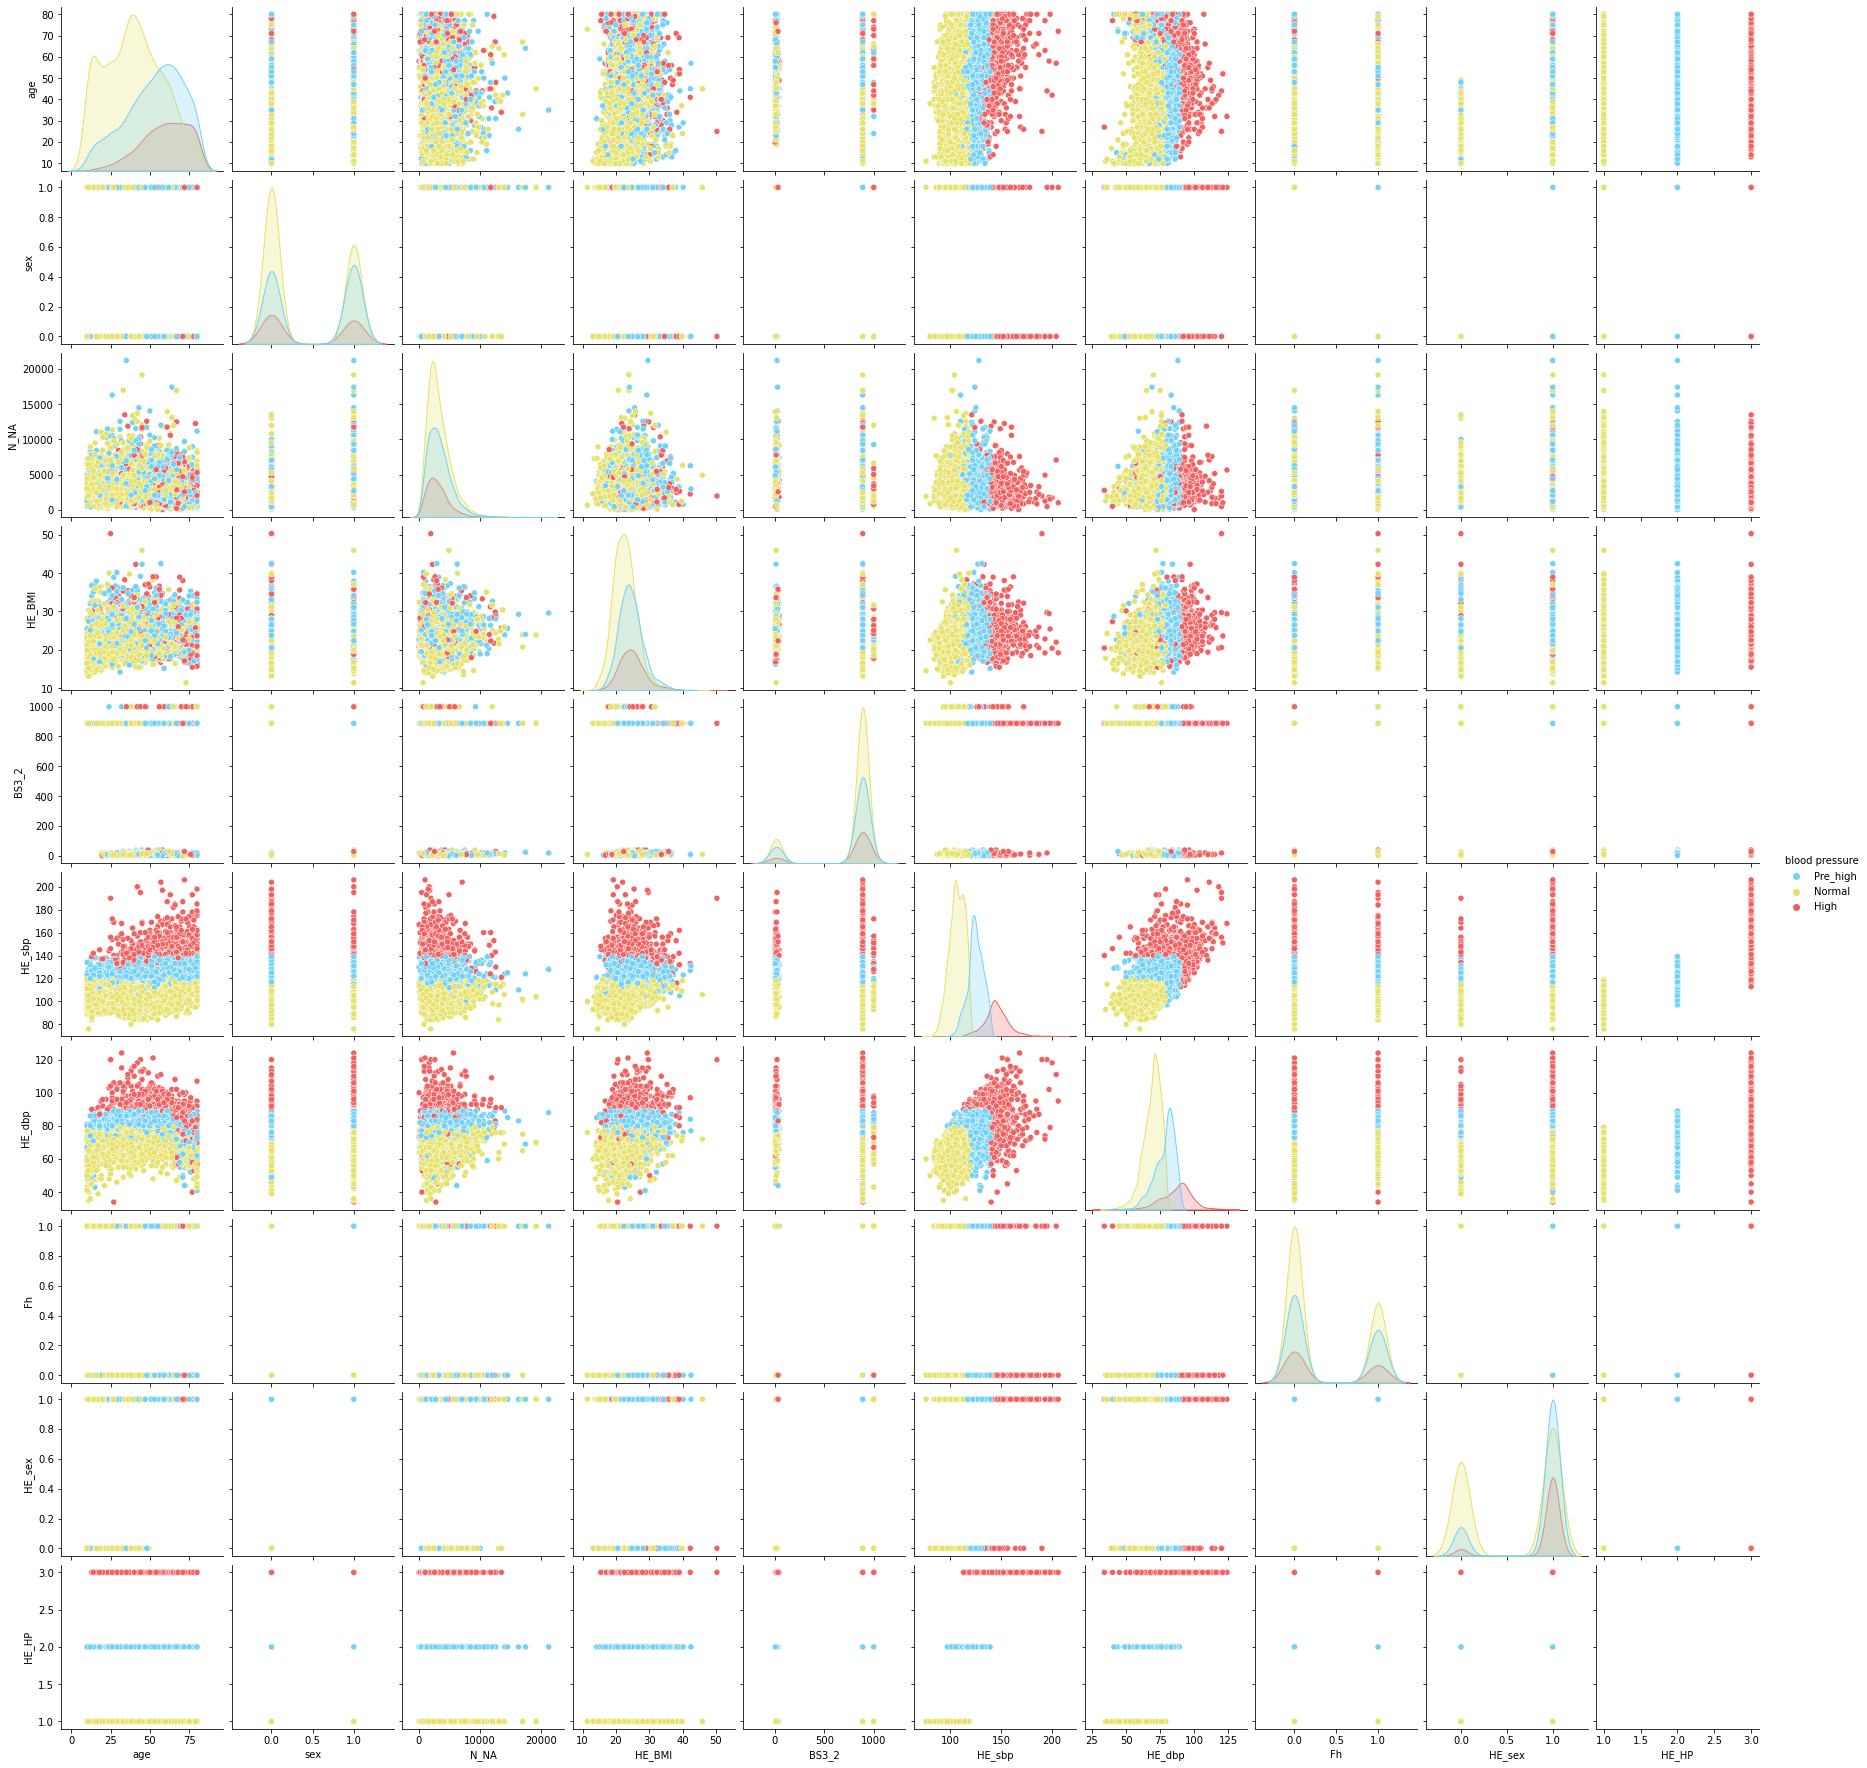

In [4]:
sns.pairplot(data, hue='blood pressure',palette = ["#72D1F7", "#E6E167", "#F26161"])
plt.show()

## 2.3 변수 간 상관관계를 다른 방법으로 시각화

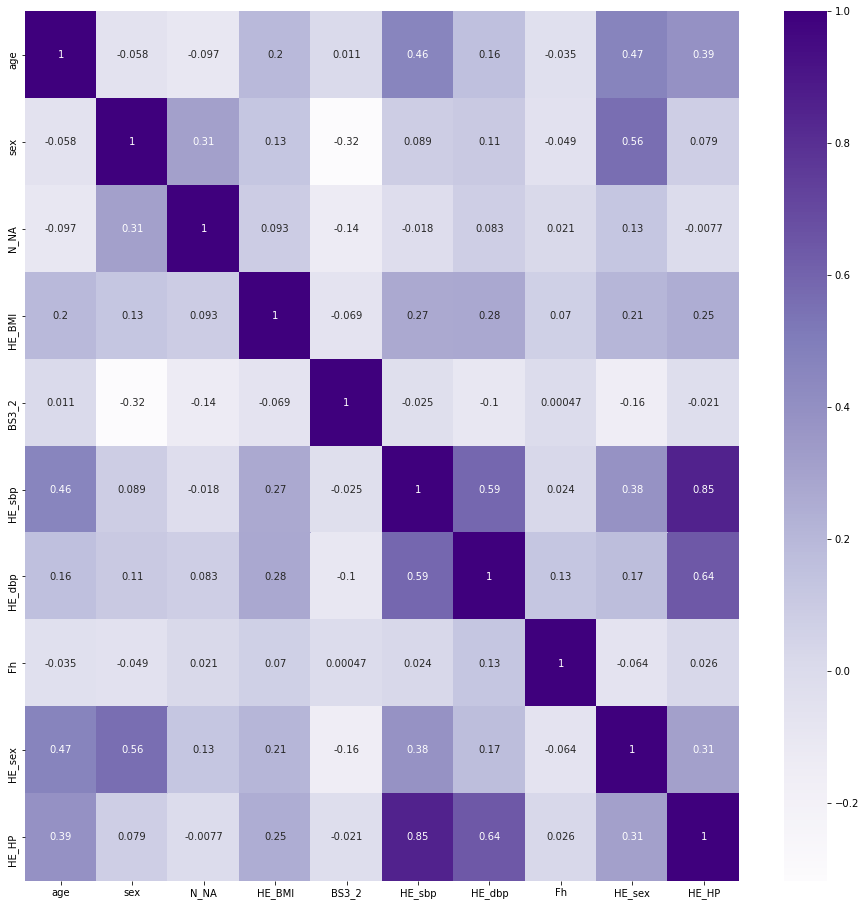

In [5]:
plt.figure(figsize=(16, 16))
sns.heatmap(data_corr, cmap='Purples', annot=True)
plt.show()

- 분석 결과: BP와 상관계수가 가장 높은 변량은 age이다.

## 2.4 age와 고혈압 유병 여부의 상관관계 결과값 검정

<AxesSubplot:xlabel='age', ylabel='HE_HP'>

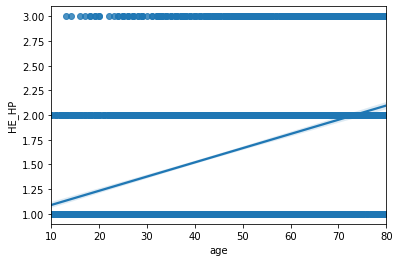

In [6]:
sns.regplot(data = data, x = 'age', y = 'HE_HP')

- 분석 결과: 젊은 연령대에서 3(고혈압) 수치가 희박하게 나타나는 것으로 보아, 나이와 고혈압 유병여부는 유의미한 관계가 있다.

In [7]:
[R1, p1] = stats.pearsonr(data.age, data.HE_HP)
print("피어슨 분석 결과: ", [R1, p1])
[R2, p2] = stats.spearmanr(data.age, data.HE_HP)
print("스피어맨 분석 결과: ", [R2, p2])

피어슨 분석 결과:  [0.38946785886419144, 1.5436663201708112e-197]
스피어맨 분석 결과:  [0.3986885687083112, 9.255917486259442e-208]


In [8]:
# [0~40): 청년, [40~60): 중년, [60~100대): 노년
age_cut = [0, 40, 60, 100]    
data['age_range'] = pd.cut(data.age, age_cut, labels = ['youth', 'middle', 'eld'], right = False)

#나이대별 사람의 결과값을 비교
data.groupby('age_range').HE_HP.describe()

,count,mean,std,min,25%,50%,75%,max
age_range,,,,,,,,
youth,1950.0,1.309744,0.548759,1.0,1.0,1.0,2.0,3.0
middle,1862.0,1.650913,0.720877,1.0,1.0,2.0,2.0,3.0
eld,1656.0,1.961957,0.730271,1.0,1.0,2.0,2.0,3.0


In [9]:
# 교차표 생성
pd.crosstab(data.HE_HP, data.age_range)

age_range,youth,middle,eld
HE_HP,,,
1,1431,922,474
2,434,668,771
3,85,272,411


In [10]:
# 카이 제곱 검정(chi-square test)으로 그룹간 빈도 비교
crosstab = pd.crosstab(data.HE_HP, data.age_range)
stats.chi2_contingency(crosstab)

(773.7383805765957,
 3.74568043877129e-166,
 4,
 array([[1008.166,  962.669,  856.165],
        [ 667.95 ,  637.807,  567.244],
        [ 273.884,  261.525,  232.591]]))

(<Figure size 432x288 with 3 Axes>,
 {('1', 'youth'): (0.000, 0.0, 0.512, 0.502838054053041),
  ('1', 'middle'): (0.000, 0.5061493123311867, 0.512, 0.3239809125345239),
  ('1', 'eld'): (0.000, 0.8334414831438564, 0.512, 0.16655851685614356),
  ('2', 'youth'): (0.517, 0.0, 0.339, 0.23017929942048557),
  ('2', 'middle'): (0.517, 0.23349055769863125, 0.339, 0.3542851889697797),
  ('2', 'eld'): (0.517, 0.5910870049465566, 0.339, 0.40891299505344325),
  ('3', 'youth'): (0.861, 0.0, 0.139, 0.10994412251655629),
  ('3', 'middle'): (0.861, 0.11325538079470199, 0.139, 0.3518211920529802),
  ('3', 'eld'): (0.861, 0.4683878311258278, 0.139, 0.5316121688741722)})

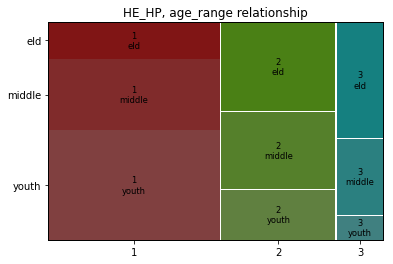

In [11]:
mosaic(data, ['HE_HP', 'age_range'], title='HE_HP, age_range relationship')

#"#72D1F7", "#E6E167", "#F26161"

- 분석 결과: 모자이크 플롯에서 고혈압 증상을 보일수록 노년층이 차지하는 비중이 커진 것을 확인할 수 있다.

## 2.5 Fh와 고혈압 유병 여부의 상관관계 결과값 검정

<AxesSubplot:xlabel='Fh', ylabel='HE_HP'>

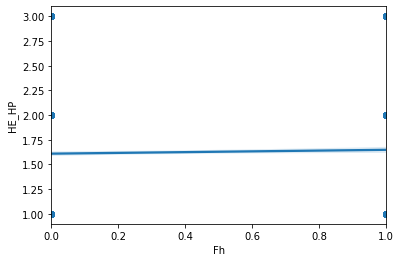

In [12]:
sns.regplot(data = data, x = 'Fh', y = 'HE_HP')

- 분석 결과: 그래프의 기울기가 0에 가까운 것으로 보아 고혈압 가족력과 유병여부는 유의미한 상관관계를 보이지 않음을 확인할 수 있다. 

In [13]:
[R1, p1] = stats.pearsonr(data.Fh, data.HE_HP)
[R2, p2] = stats.spearmanr(data.Fh, data.HE_HP)
print("피어슨 분석 결과: ", [R1, p1])
print("스피어맨 분석 결과: ", [R2, p2])

피어슨 분석 결과:  [0.025901990491664237, 0.0554631675377907]
스피어맨 분석 결과:  [0.029437916971604777, 0.029496382822830385]


In [14]:
#아버지의 유병률 여부별 결과값을 비교
data.groupby('Fh').HE_HP.describe()

,count,mean,std,min,25%,50%,75%,max
Fh,,,,,,,,
0,3533.0,1.609680,0.718772,1.0,1.0,1.0,2.0,3.0
1,1935.0,1.648579,0.716562,1.0,1.0,2.0,2.0,3.0


In [15]:
# 교차표 생성
pd.crosstab(data.HE_HP, data.Fh)

Fh,0,1
HE_HP,,
1,1871,956
2,1170,703
3,492,276


In [16]:
# 카이 제곱 검정(chi-square test)으로 그룹간 빈도 비교
crosstab = pd.crosstab(data.HE_HP, data.Fh)
stats.chi2_contingency(crosstab)

(6.9240918730122845,
 0.03136552445626908,
 2,
 array([[1826.589, 1000.411],
        [1210.188,  662.812],
        [ 496.222,  271.778]]))

(<Figure size 432x288 with 3 Axes>,
 {('2', '0'): (0.000, 0.0, 0.339, 0.622591007373535),
  ('2', '1'): (0.000, 0.6259132665097477, 0.339, 0.3740867334902523),
  ('1', '0'): (0.344, 0.0, 0.512, 0.6596335525844168),
  ('1', '1'): (0.344, 0.6629558117206293, 0.512, 0.33704418827937055),
  ('3', '0'): (0.861, 0.0, 0.139, 0.6384966777408637),
  ('3', '1'): (0.861, 0.6418189368770764, 0.139, 0.3581810631229236)})

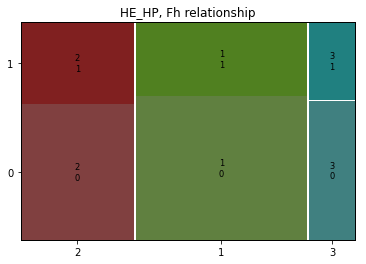

In [17]:
# 그룹 비교
mosaic(data, ['HE_HP', 'Fh'], title='HE_HP, Fh relationship')

- 분석 결과: 모자이크 플롯에서 고혈압 증상을 보일수록 가족력에 별다른 비중의 변화가 없으므로,<br> 가족력과 고혈압 유병여부는 유의미한 관계를 가지고 있다 보기 어렵다.

-------
# 3. 다중선형 회귀 모델링<br>

## 3.1 수축기 혈압 예측 모델 생성

In [18]:
## 단계별 선택법
variables = list(data[['age', 'sex', 'N_NA', 'HE_BMI', 'BS3_2', 'HE_sex', 'Fh']])
y = data['HE_sbp'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = data[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(data[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

selected_variables

['age', 'HE_sex', 'HE_BMI', 'Fh', 'N_NA']

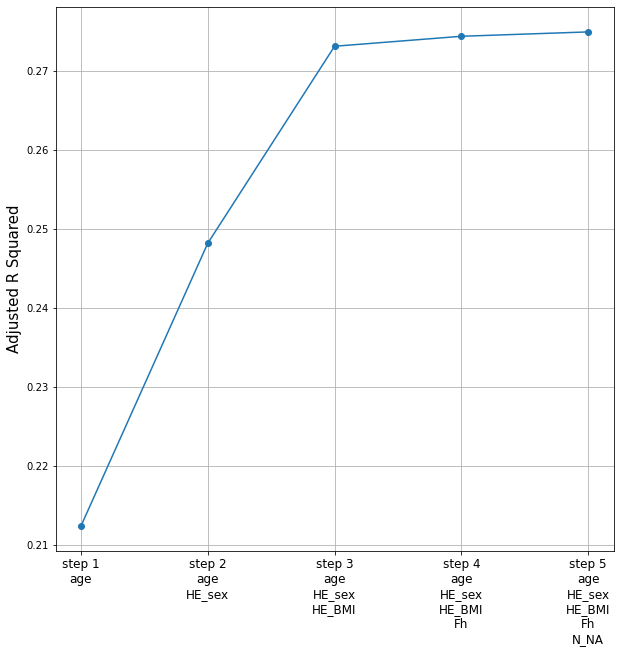

In [19]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [20]:
re_sbp_model = smf.ols(" HE_sbp ~ age + HE_BMI + HE_sex + Fh + N_NA",  data=data).fit()
data['predict_sbp'] = re_sbp_model.predict()
re_sbp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HE_sbp   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     415.7
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:27:36   Log-Likelihood:                -22141.
No. Observations:                5468   AIC:                         4.429e+04
Df Residuals:                    5462   BIC:                         4.433e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.5225      1.233     67.764      0.000      81.106      85.939
age            0.2809      0.011     25.130      0.000       0.259       0.303
HE_BMI         0.6969      0.051     13.567      0.000       0.596       0.798
HE_sex         7.1660      0.486     14.760      0.000       6.214       8.118
Fh             1.3006      0.395      3.292      0.001       0.526       2.075
N_NA          -0.0002   9.74e-05     -2.274      0.023      -0.000   -3.06e-05
==============================================================================
Omnibus:                      649.457   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1328.321
Skew:                           0.745   Prob(JB):                    3.62e-289
Kurtosis:                       4.901   Cond. No.                     2.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.2 이완기 혈압 모델 생성

In [21]:
## 단계별 선택법
variables = list(data[['age', 'sex', 'N_NA', 'HE_BMI', 'BS3_2', 'HE_sex', 'Fh']])
y = data['HE_dbp'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = data[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(data[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

selected_variables

['HE_BMI', 'HE_sex', 'Fh', 'BS3_2', 'age', 'N_NA']

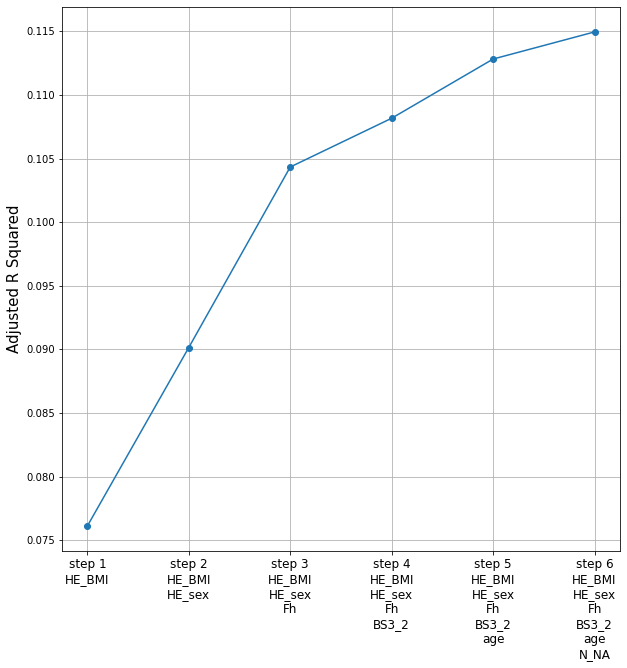

In [22]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [23]:
re_dbp_model = smf.ols("HE_dbp ~ HE_sex + HE_BMI + Fh + age + BS3_2 + N_NA",  data=data).fit()
data['predict_dbp'] = re_dbp_model.predict()
re_dbp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HE_dbp   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     119.4
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          3.86e-142
Time:                        15:27:37   Log-Likelihood:                -20085.
No. Observations:                5468   AIC:                         4.018e+04
Df Residuals:                    5461   BIC:                         4.023e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.9672      0.931     61.204      0.000      55.142      58.792
HE_sex         1.7193      0.338      5.094      0.000       1.058       2.381
HE_BMI         0.6012      0.035     17.035      0.000       0.532       0.670
Fh             2.5454      0.271      9.382      0.000       2.014       3.077
age            0.0465      0.008      6.033      0.000       0.031       0.062
BS3_2         -0.0022      0.000     -5.099      0.000      -0.003      -0.001
N_NA           0.0003   6.72e-05      3.763      0.000       0.000       0.000
==============================================================================
Omnibus:                      196.228   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.111
Skew:                           0.281   Prob(JB):                     1.42e-79
Kurtosis:                       4.131   Cond. No.                     2.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4. 모델 예측

## 4.1 고혈압 유병 여부 예측

In [26]:
lm_sbp = smf.ols( "HE_sbp ~ age + N_NA + HE_BMI + Fh + HE_sex",  data=data).fit()
lm_dbp = smf.ols( "HE_dbp ~ age + N_NA + HE_BMI + Fh + BS3_2 + HE_sex",  data=data).fit()

def problem(age, N_NA, HE_BMI, Fh, BS3_2, HE_sex):
    s_beta0 = lm_sbp.params[0]
    s_beta1 = lm_sbp.params[1]
    s_beta2 = lm_sbp.params[2]
    s_beta3 = lm_sbp.params[3]
    s_beta4 = lm_sbp.params[4]
    s_beta5 = lm_sbp.params[5]
    sbp = s_beta0 + s_beta1 * age + s_beta2 * N_NA + s_beta3 * HE_BMI + s_beta4 * Fh + s_beta5 * HE_sex
    
    d_beta0 = lm_dbp.params[0]
    d_beta1 = lm_dbp.params[1]
    d_beta2 = lm_dbp.params[2]
    d_beta3 = lm_dbp.params[3]
    d_beta4 = lm_dbp.params[4]
    d_beta5 = lm_dbp.params[5]
    d_beta6 = lm_dbp.params[6]
    dbp = d_beta0 + d_beta1 * age + d_beta2 * N_NA + d_beta3 * HE_BMI + d_beta4 * Fh + d_beta5 * BS3_2 + d_beta6 * HE_sex
    
    print("수축기 혈압 예측값: " , sbp.round(1))
    print("이완기 혈압 예측값: " , dbp.round(1))    
    
    if (sbp >=140 or dbp >= 90):
        return print("고혈압 유병 여부 예측: 고혈압")
    if (sbp >= 120 and sbp < 140) or (dbp >= 80 and dbp < 90):
        return print("고혈압 유병 여부 예측: 고혈압 전단계")
    else:
        return print("고혈압 유병 여부 예측: 정상")
        
answer1 = problem(80, 3529.636494, 21.325232, 0, 888.0, 1)
print("-------------------------")
print("수축기 혈압 실제값 :" , data.loc[8105,'HE_sbp'])
print("이완기 혈압 실제값 :" , data.loc[8105,'HE_dbp'])
print("실제 고혈압 유병 여부 : 고혈압 전단계")

수축기 혈압 예측값:  127.2
이완기 혈압 예측값:  74.2
고혈압 유병 여부 예측: 고혈압 전단계
-------------------------
수축기 혈압 실제값 : 125.0
이완기 혈압 실제값 : 76.0
실제 고혈압 유병 여부 : 고혈압 전단계


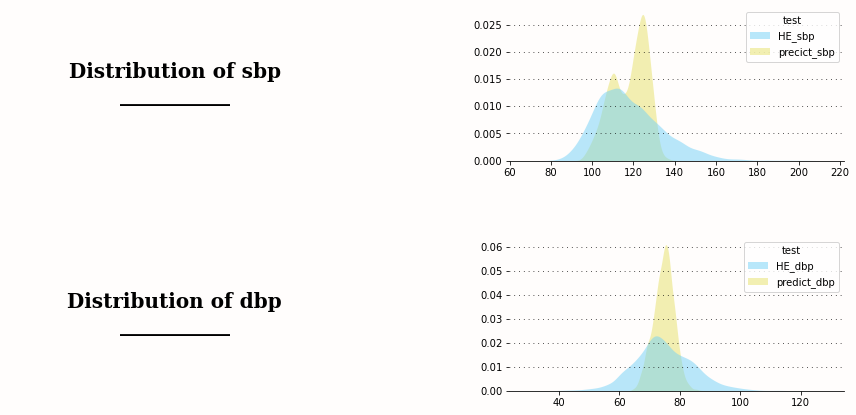

In [27]:
a = data.loc[:, ["HE_sbp"]]
a['test'] = "HE_sbp"
a_t = data.loc[:, ["predict_sbp"]]
a_t['test'] = "precict_sbp"
a.rename(columns={"HE_sbp":"predict_sbp"}, inplace=True)
aa = pd.concat([a, a_t])
b = data.loc[:, ["HE_dbp"]]
b['test'] = "HE_dbp"
b_t = data.loc[:, ["predict_dbp"]]
b_t['test'] = "predict_dbp"
b.rename(columns={"HE_dbp":"predict_dbp"}, inplace=True)
bb = pd.concat([b, b_t])

fig = plt.figure(figsize=(15,24))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

background_color = "#fffdfc"
color_palette = ["#72D1F7","#53FF75","#E6E167","#FCBB65","#F26161"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)

# sbp title
ax0.text(0.5,0.5,"Distribution of sbp\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 20,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# sbp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=aa, x='predict_sbp',hue="test", fill=True,palette=["#72D1F7", "#E6E167"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# dbp title
ax2.text(0.5,0.5,"Distribution of dbp\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 20,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# dbp
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=bb, x='predict_dbp',hue="test", fill=True,palette=["#72D1F7", "#E6E167"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")



for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

* 모델을 통해 고혈압 유병 여부 예측해 본 결과, 좁은 범위에서만 예측이 이루어졌다. <br>
이와 같이 예측률이 떨어지는 이유는 질병은 여러 요인들이 복합적으로 작용하여 나타나는 경우가 많은데 특정 요인만 임의대로 추출하여 예측을 하였기 때문이라고 생각한다. 또한, 초반에 상관관계 분석 부분에서도 알 수 있듯이 임의로 추출한 변수들 자체가 고혈압 발병과 큰 상관관계가 적었고 상관관계가 적은 변수들로 예측하였기 때문에 모델의 성능이 떨어진다고 생각한다. 

-------
# 5. 결론 및 고찰

### Q1. 고혈압 발병에 가장 많은 영향을 주는 요소와 가장 적은 영향을 주는 요소는 무엇인가?
* 고혈압 발병에 가장 많은 영향을 주는 요소는 <font color=#00008C>**'나트륨 섭취량'**</font>일 것이다. <br>
* 고혈압 발병에 가장 적은 영향을 주는 요소는 <font color=#00008C>**'성별'**</font>일 것이다.<br>

#### A1. 고혈압 유병 여부와 변수들 간의 상관관계 분석 결과, 
#### 고혈압 유병 여부와 가장 상관관계가 많은 변수는 <font color=#CD0000>**'age'**</font>(나이)였으며,   
#### 가장 상관관계가 적은 변수는 <font color=#CD0000>**'N_NA'**</font>(나트륨 섭취량(mg))이었다. <br><br>

### Q2. 고혈압은 가족력의 영향을 많이 받는가?
* 고혈압은 <font color=#00008C>**'가족력'**</font>의 영향을 많이 받을 것이다.  <br>
* 고혈압은 가족력이 아닌 <font color=#00008C>**'후천적인 요소'**</font>에 영향을 많이 받을 것이다.  <br>

#### A2. 고혈압 가족력을 가지고 있는 사람과 가지고 있지 않은 사람 간의 상관관계를 분석하니 그리 유의미한 결과값이 나오지는 않았다. 
(여기서 '가족력'은 부모의 유병 여부를 기준으로 한다.)<br>
#### 단, '아버지'의 유병 여부보다는 '어머니'의 유병여부가 고혈압 발병과 더 밀접한 상관관계를 가진 것으로 나타났다.
#### 그렇다고 해서 다른 후천적인 요소가 선천적 요소인 '나이'보다 유의미한 상관관계를 가지지도 않으니, 
#### 후천적인 요소에 영향을 많이 받는다는 결론을 내리기도 힘들다. <br><br>

### Q3. 다중 선형 회귀 분석을 통해 고혈압 유병여부를 예측하는 모델을 만들 수 있는가?
#### A3. '6. 모델 예측' 참고